In [1]:
import json, glob, pycm, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["id"]}: {experiment["concept"]["label"]}'))
    display(Markdown(experiment["concept"]["definition"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='Predict', ylabel='Actual')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["name", "description", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False positives"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["name", "description", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### False negatives"))
        display(df_fn_styler)

In [3]:
experiments = [ json.load(open(file, 'r')) for file in glob.glob('wd_experiments/*/gpt-4*') ]

In [4]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": f'{pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC:.1%}',
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    } 
    for experiment in experiments ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
2,electoral list,1.00,High,100.0%,0,0,20
10,distributary,0.90,High,95.0%,0,1,20
4,soup,0.80,High,90.0%,2,0,20
5,book of hours,0.80,High,90.0%,0,1,10
13,physics,0.80,High,90.0%,1,1,20
1,French wine,0.80,High,90.0%,2,0,20
9,poison,0.80,High,90.0%,2,0,20
12,religion,0.70,Tentative,85.0%,0,3,20
6,resort town,0.70,Tentative,85.0%,1,2,20
11,reflection nebula,0.60,Low,80.0%,0,4,20


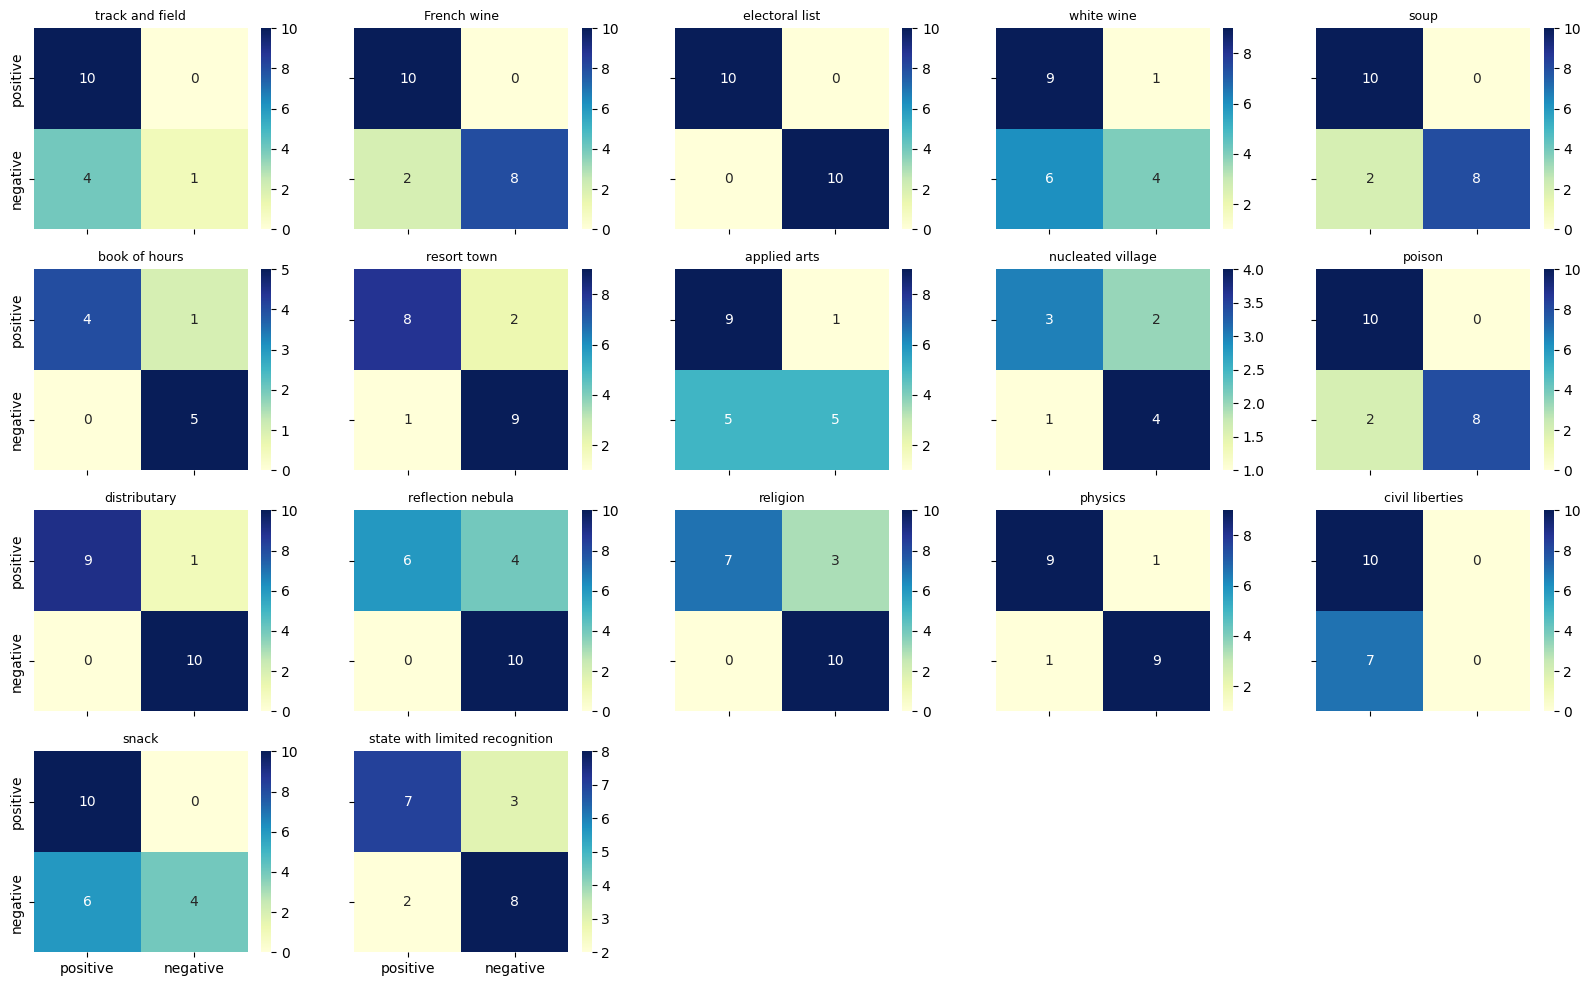

In [60]:
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(4, 5)
axes = gs.subplots(sharex=True, sharey=True)
cms = [ (experiment["concept"]["label"], pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])) for experiment in experiments ]
for ax, (name, cm) in zip(axes.flat, cms):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name, wrap=True, fontsize=9)
for ax in axes.flat[len(cms):]:
    ax.set_visible(False)
plt.show()

## Q355844: electoral list

An electoral list is a grouping of candidates for election, usually found in proportional or mixed electoral systems, but also in some plurality electoral systems. An electoral list can be registered by a political party (a party list) or can constitute a group of independent candidates. Lists can be open, in which case electors have some influence over the ranking of the winning candidates, or closed, in which case the order of candidates is fixed at the registration of the list. Electoral lists are required for party-list proportional representation systems. An electoral list is made according to the applying nomination rules and election rules. Depending on the type of election, a political party, a general assembly, or a board meeting, may elect or appoint a nominating committee that will add, and if required, prioritize list-candidates according to their preferences. Qualification, popularity, gender, age, geography, and occupation are preferences that may influence the committee's work. The committee's proposed list may then be changed in a selection meeting, where new candidates may be added, or existing candidates may be moved or removed from the list. When the internal process is over, the final list is made public. The list may be printed on the ballot paper cast by voters at the election, or on a separate voter information paper.

### Confusion matrix

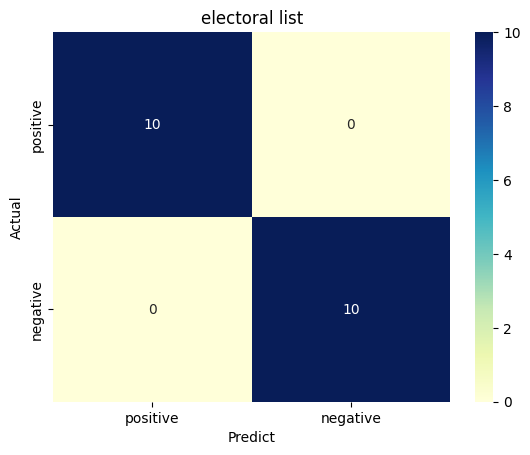

## Q591942: distributary

A distributary, or a distributary channel, is a stream that branches off and flows away from a main stream channel, a phenomenon known as river bifurcation. A distributary is effectively the opposite of a tributary, which is a stream that flows towards and into another stream or river. Distributaries are often found where a stream approaches a lake or an ocean; as such, they are a common feature of river deltas. They can also occur inland, on alluvial fans, or where a tributary stream bifurcates as it nears its confluence with a larger stream. In some cases, a minor distributary can divert so much water from the main channel that it can later become the main route.

### Confusion matrix

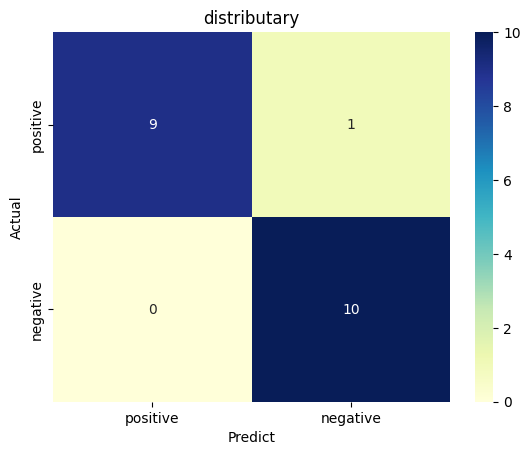

### False negatives

name,description,rationale
Mỹ Tho River,The Mỹ Tho River (Vietnamese: Sông Mỹ Tho) is a river of Vietnam. It flows for 45.3 kilometres (28.1 mi) through Bến Tre Province and Tiền Giang Province.,"The definition provided does not offer sufficient information to definitively argue that the Mỹ Tho River is a distributary. The description of the Mỹ Tho River does not indicate that it branches off and flows away from a main stream channel, which is a key characteristic of a distributary. Therefore, based solely on the information provided, we cannot assert that the Mỹ Tho River is a distributary."


## Q41415: soup

Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, milk, or water. Hot soups are additionally characterized by boiling solid ingredients in liquids in a pot until the flavors are extracted, forming a broth. Soups are similar to stews, and in some cases there may not be a clear distinction between the two; however, soups generally have more liquid (broth) than stews.In traditional French cuisine, soups are classified into two main groups: clear soups and thick soups. The established French classifications of clear soups are bouillon and consommé. Thick soups are classified depending upon the type of thickening agent used: purées are vegetable soups thickened with starch; bisques are made from puréed shellfish or vegetables thickened with cream; cream soups may be thickened with béchamel sauce; and veloutés are thickened with eggs, butter, and cream. Other ingredients commonly used to thicken soups and broths include  rice, lentils, flour, and grains; many popular soups also include pumpkin, carrots, potatoes, pig's trotters and bird's nests.Other types of soup include fruit soups, dessert soups, pulse soups like split pea, cold soups and other styles.

### Confusion matrix

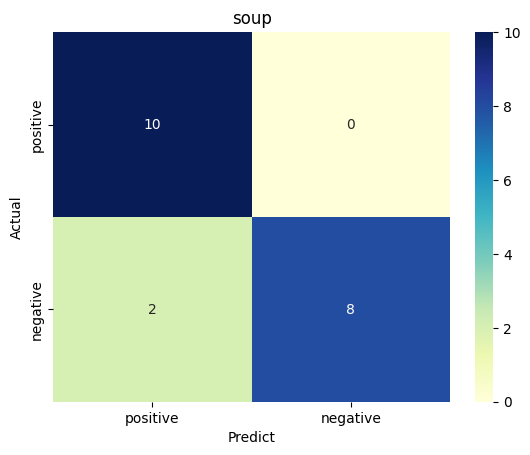

### False positives

name,description,rationale
Goulash,"Goulash (Hungarian: gulyás) is a soup or stew of meat and vegetables seasoned with paprika and other spices. Originating in Hungary, goulash is a common meal predominantly eaten in Central Europe but also in other parts of Europe. It is one of the national dishes of Hungary and a symbol of the country.Its origin may be traced back as far as the 10th century, to stews eaten by Hungarian shepherds. At that time, the cooked and flavored meat was dried with the help of the sun and packed into bags produced from sheep's stomachs, needing only water to make it into a meal. Earlier versions of goulash did not include paprika, as it was not introduced to Europe until the 16th century.","Goulash fits the definition of a soup because it is a primarily liquid food made by combining ingredients of meat and vegetables with water. The process of making goulash involves boiling these solid ingredients in liquid until the flavors are extracted, forming a broth, which is a characteristic of hot soups. Furthermore, goulash is seasoned with paprika and other spices, which aligns with the practice of flavoring soups. Although goulash can also be classified as a stew, the definition acknowledges that there may not always be a clear distinction between soups and stews. Therefore, based on the provided definition, goulash can be considered a type of soup."
Bozbash,"Bozbash (Azerbaijani: bozbaş; Persian: آبگوشت بزباش; Tat: guşto buzbaş) is an Iranian dish consisting of meat stew (also described as a soup) popular in Armenia, Azerbaijan and Iran.","Bozbash fits the definition of a soup as it is a primarily liquid food made by combining ingredients of meat with stock or water. It is described as a meat stew, which according to the definition, can be similar to soup with the main difference being the amount of liquid or broth. While the exact amount of liquid in Bozbash is not specified, the fact that it is also described as a soup suggests that it likely contains a substantial amount of broth, aligning it with the definition of soup. Therefore, based on the provided definition, Bozbash can be classified as a soup."


## Q727715: book of hours

Books of hours (Latin: horae) are Christian prayer books which were used to pray the canonical hours. The use of a book of hours was especially popular in the Middle Ages and as a result, they are the most common type of surviving medieval illuminated manuscript. Like every manuscript, each manuscript book of hours is unique in one way or another, but most contain a similar collection of texts, prayers and psalms, often with appropriate decorations, for Christian devotion. Illumination or decoration is minimal in many examples, often restricted to decorated capital letters at the start of psalms and other prayers, but books made for wealthy patrons may be extremely lavish, with full-page miniatures. These illustrations would combine picturesque scenes of country life with sacred images.: 46 Books of hours were usually written in Latin (they were largely known by the name horae until "book of hours" was relatively recently applied to them), although there are many entirely or partially written in vernacular European languages, especially Dutch. The closely related primer is occasionally considered synonymous with books of hours–a medieval horae was referred to as a primer in Middle English–but their contents and purposes could deviate significantly from the simple recitation of the canonical hours. Tens of thousands of books of hours have survived to the present day, in libraries and private collections throughout the world. The typical book of hours is an abbreviated form of the breviary, which contains the Divine Office recited in monasteries. It was developed for lay people who wished to incorporate elements of monasticism into their devotional life. Reciting the hours typically centered upon the reading of a number of psalms and other prayers. A typical book of hours contains the Calendar of Church feasts, extracts from the Four Gospels, the Mass readings for major feasts, the Little Office of the Blessed Virgin Mary, the fifteen Psalms of Degrees, the seven Penitential Psalms, a Litany of Saints, an  Office for the Dead and the Hours of the Cross. Most 15th-century books of hours have these basic contents. The Marian prayers Obsecro te ("I beseech thee") and O Intemerata ("O undefiled one") were frequently added, as were devotions for use at Mass, and meditations on the Passion of Christ, among other optional texts. Such books of hours continue to be used by many Christians today, such as the Catholic “Key of Heaven” prayer books, the Agpeya of Coptic Christianity or The Brotherhood Prayer Book of Lutheranism.

### Confusion matrix

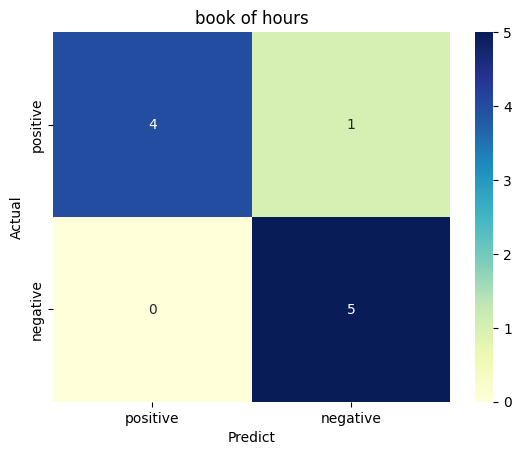

### False negatives

name,description,rationale
List of name days in France,This is a calendar of name days in France.,"The assertion that the List of name days in France is a book of hours cannot be supported based on the provided definition. The definition of a book of hours specifies that it is a Christian prayer book used to pray the canonical hours, containing texts, prayers, and psalms for Christian devotion, often with appropriate decorations. It also includes specific content such as the Calendar of Church feasts, extracts from the Four Gospels, the Mass readings for major feasts, the Little Office of the Blessed Virgin Mary, the fifteen Psalms of Degrees, the seven Penitential Psalms, a Litany of Saints, an Office for the Dead and the Hours of the Cross. The List of name days in France, as per the entity description, is a calendar of name days. There is no information provided that suggests it contains prayers, psalms, or any of the specific content mentioned in the definition of a book of hours. Therefore, based on the given definition and entity description, it cannot be argued that the List of name days in France is a book of hours."


## Q413: physics

Physics is the natural science of matter, involving the study of matter, its fundamental constituents, its motion and behavior through space and time, and the related entities of energy and force. Physics is one of the most fundamental scientific disciplines, with its main goal being to understand how the universe behaves. A scientist who specializes in the field of physics is called a physicist. Physics is one of the oldest academic disciplines and, through its inclusion of astronomy, perhaps the oldest. Over much of the past two millennia, physics, chemistry, biology, and certain branches of mathematics were a part of natural philosophy, but during the Scientific Revolution in the 17th century these natural sciences emerged as unique research endeavors in their own right. Physics intersects with many interdisciplinary areas of research, such as biophysics and quantum chemistry, and the boundaries of physics are not rigidly defined. New ideas in physics often explain the fundamental mechanisms studied by other sciences and suggest new avenues of research in these and other academic disciplines such as mathematics and philosophy. Advances in physics often enable new technologies. For example, advances in the understanding of electromagnetism, solid-state physics, and nuclear physics led directly to the development of new products that have dramatically transformed modern-day society, such as television, computers, domestic appliances, and nuclear weapons; advances in thermodynamics led to the development of industrialization; and advances in mechanics inspired the development of calculus.

### Confusion matrix

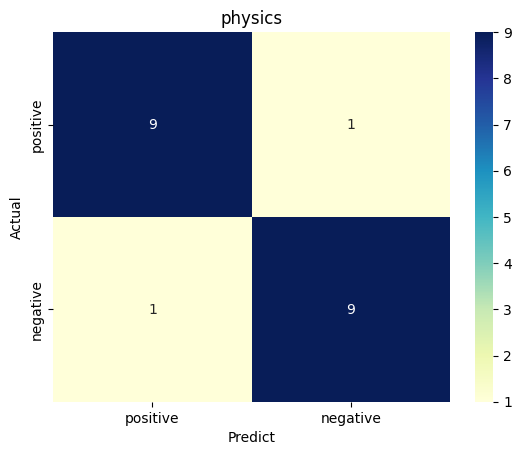

### False positives

name,description,rationale
Groundwater contamination by pharmaceuticals,"Groundwater contamination by pharmaceuticals, which belong to the category of contaminants of emerging concern (CEC) or emerging organic pollutants (EOP), has been receiving increasing attention in the fields of environmental engineering, hydrology and hydrogeochemistry since the last decades of the twentieth century.Pharmaceuticals are suspected to provoke long-term effects in aquatic ecosystems even at low concentration ranges (trace concentrations) because of their bioactive and chemically stable nature, which leads to recalcitrant behaviours in the aqueous compartments, a feature that is typically associated with the difficulty in degrading these compounds to innocuous molecules, similarly with the behaviour exhibited by persistent organic pollutants. Furthermore, continuous release of medical products in the water cycle poses concerns about bioaccumulation and biomagnification phenomena. As the vulnerability of groundwater systems is increasingly recognized even from the regulating authority (the European Medicines Agency, EMA), environmental risk assessment (ERA) procedures, which is required for pharmaceuticals appliance for marketing authorization and preventive actions urged to preserve these environments.In the last decades of the twentieth century, scientific research efforts have been fostered towards deeper understanding of the interactions of groundwater transport and attenuation mechanisms with the chemical nature of polluting agents. Amongst the multiple mechanisms governing solutes mobility in groundwater, biotransformation and biodegradation play a crucial role in determining the evolution of the system (as identified by developing concentration fields) in the presence of organic compounds, such as pharmaceuticals. Other processes that might impact on pharmaceuticals fate in groundwater include classical advective-dispersive mass transfer, as well as geochemical reactions, such as adsorption onto soils and dissolution / precipitation.One major goal in the field of environmental protection and risk mitigation is the development of mathematical formulations yielding reliable predictions of the fate of pharmaceuticals in aquifer systems, eventually followed by an appropriate quantification of predictive uncertainty and estimation of the risks associated with this kind of contamination.","Groundwater contamination by pharmaceuticals can be considered a topic within the field of physics because it involves the study of matter and its behavior through space and time. Pharmaceuticals, as matter, move and interact within the groundwater system, which can be studied using principles of physics. The processes that impact the fate of pharmaceuticals in groundwater, such as advective-dispersive mass transfer and geochemical reactions like adsorption onto soils and dissolution/precipitation, are all phenomena that can be analyzed and understood through the lens of physics. Furthermore, the development of mathematical formulations to predict the fate of these pharmaceuticals in aquifer systems aligns with the physics' goal of understanding how the universe behaves. Therefore, it can be argued that groundwater contamination by pharmaceuticals falls under the domain of physics."


### False negatives

name,description,rationale
Slavic creation myth,"The Slavic creation myth is a cosmogonic myth in Slavic mythology that explains how the world was created, who created it, and what principles guide it. This myth, in its Christianized form, survived until the nineteenth and twentieth century in various parts of the Slavdom in chronicles or folklore. In the Slavic mythology there are three versions of this myth: the first version is the so-called earth-diver myth, which intertwines two main motifs: the dualistic motif – the cooperation of God and the Devil (that is, the ""good god"" and the ""bad god"") is required to create the world, and the oceanic motif – the pre-existence water, where the seed of the Earth comes from; the second version speaks about the origin of the universe and the world from the Cosmic Egg and the World Tree; the third one about creation from a dismemberment of a primordial being.","The Slavic creation myth cannot be classified as physics based on the provided definition. Physics is a natural science that studies matter, its motion and behavior through space and time, and the related entities of energy and force. It aims to understand how the universe behaves. The Slavic creation myth, on the other hand, is a cosmogonic myth that explains how the world was created and what principles guide it. While both involve the universe and its behavior, the creation myth is a narrative explanation based on cultural beliefs, not a scientific study based on empirical evidence and mathematical models as physics is. Therefore, the Slavic creation myth cannot be considered physics."


## Q630531: French wine

French wine is produced all throughout France, in quantities between 50 and 60 million hectolitres per year, or 7–8 billion bottles. France is one of the largest wine producers in the world, along with Italian, Spanish, and American wine-producing regions. French wine traces its history to the 6th century BCE, with many of France's regions dating their wine-making history to Roman times. The wines produced range from expensive wines sold internationally to modest wines usually only seen within France such as the Margnat wines of the post war period. Two concepts central to the better French wines are the notion of terroir, which links the style of the wines to the locations where the grapes are grown and the wine is made, and the Appellation d'origine contrôlée (AOC) system, replaced by the Appellation d'Origine Protégée (AOP) system in 2012. Appellation rules closely define which grape varieties and winemaking practices are approved for classification in each of France's several hundred geographically defined appellations, which can cover regions, villages or vineyards. France is the source of many grape varieties (such as Cabernet Sauvignon, Chardonnay, Pinot noir, Sauvignon blanc, Syrah) that are now planted throughout the world, as well as wine-making practices and styles of wine that have been adopted in other producing countries. Although some producers have benefited in recent years from rising prices and increased demand for prestige wines from Burgundy and Bordeaux, competition from New World wines has contributed to a decline in the domestic and international consumption of French wine.

### Confusion matrix

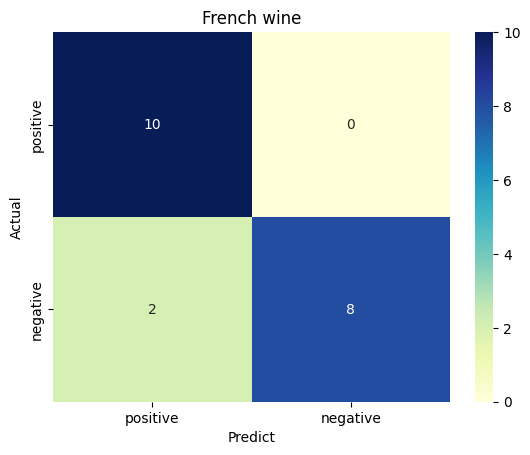

### False positives

name,description,rationale
Banyuls AOC,"Banyuls is a French appellation d'origine contrôlée (AOC) for a fortified apéritif or dessert wine made from old vines cultivated in terraces on the slopes of the Catalan Pyrenees in the Roussillon county of France, bordering, to the south, the Empordà wine region in Catalonia in Spain. The AOC production area is limited to four communes of the Côte Vermeille: Banyuls (from which the AOC takes its name), Cerbère, Collioure and Port-Vendres. The boundaries of the AOC are identical to those of the Collioure AOC. Banyuls Grand Cru is an AOC for superior wines that would otherwise be classified as simply Banyuls. They must be matured for 30 months. The grapes permitted are the same.","The definition of French wine includes wines produced all throughout France and are classified under the Appellation d'origine contrôlée (AOC) system. The entity Banyuls AOC is described as a French appellation d'origine contrôlée (AOC) for a fortified apéritif or dessert wine. It is produced in the Roussillon county of France, which is a region within the country. Therefore, based on the provided definition and information, Banyuls AOC can be classified as a French wine."
Beaune wine,"Beaune wine is produced in the commune of Beaune in the Côte de Beaune subregion of Burgundy. The appellation d'origine contrôlée (AOC) Beaune may be used for red and white wine with respectively Pinot noir and Chardonnay as the main grape variety. The production consists of slightly over 85 percent red wine, and slightly less than 15 percent white wine. While there are no Grand cru vineyards within Beaune, there are several well-known and highly regarded Premier cru vineyards, including some that are owned by the large négociant houses in Beaune and produce some of their ""flagship"" wines at the Premier cru level. The AOC was created in 1936. In 2008, there was 411.7 hectares (1,017 acres) of vineyard surface in production for Beaune wine at village and Premier cru level, making Beaune the largest village-named appellation of the Côte d'Or, just ahead of Gevrey-Chambertin AOC in vineyard size. A total of 15,652 hectolitres of wine were produced in 2008, of which 13,319 hectolitres were red wine and 2,333 hectolitres white wine. Some 357.06 hectares (882.3 acres) of this area was used for the red wines in 2007. The total amount produced corresponds to almost 2.1 million bottles, which included almost 1.8 million bottles of red wine and a little over 300,000 bottles of white wine. For white wines, the AOC regulations allow both Chardonnay and Pinot blanc to be used, but most wines are 100% Chardonnay. The AOC regulations also allow up to 15 percent total of Chardonnay, Pinot blanc and Pinot gris as accessory grapes in the red wines, but this is not practised very often. The allowed base yield is 40 hectoliters per hectare of red wine and 45 hectoliters per hectare for white wine. The grapes must reach a maturity of at least 10.5 percent potential alcohol for village-level red wine, 11.0 percent for village-level white wine and Premier Cru red wine, and 11.5 percent for Premier cru white wine. Beaune is also the centre of the Burgundy wine business, with most of the largest négociants located in the town, as well as the Hospices de Beaune, which annually holds a charity wine auction.","The definition of French wine states that it is produced all throughout France and that the Appellation d'origine contrôlée (AOC) system, replaced by the Appellation d'Origine Protégée (AOP) system in 2012, closely defines which grape varieties and winemaking practices are approved for classification in each of France's several hundred geographically defined appellations. The entity description of Beaune wine states that it is produced in the commune of Beaune in the Côte de Beaune subregion of Burgundy, which is a region in France. It also mentions that the appellation d'origine contrôlée (AOC) Beaune may be used for red and white wine, indicating 

## Q40867: poison

A poison is any chemical substance that is harmful or lethal to living organisms. The term is used in a wide range of scientific fields and industries, where it is often specifically defined. It may also be applied colloquially or figuratively, with a broad sense. Whether something is considered a poison or not may depend on the amount, the circumstances, and what living things are present. Poisoning could be accidental or deliberate, and if the cause can be identified there may be ways to neutralise the effects or minimise the symptoms. In biology, a poison is a chemical substance causing death, injury or harm to organisms or their parts. In medicine, poisons are a kind of toxin that are delivered passively, not actively. In industry the term may be negative, something to be removed to make a thing safe, or positive, an agent to limit unwanted pests. In ecological terms, poisons introduced into the environment can later cause unwanted effects elsewhere, or in other parts of the food chain.

### Confusion matrix

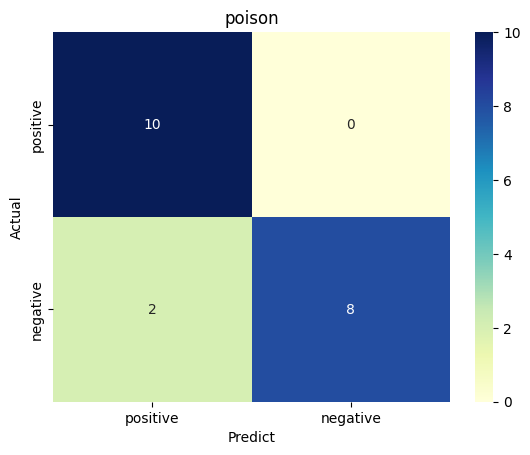

### False positives

name,description,rationale
RAAD (anti-tank guided missile),"The Raad (Persian: رعد, ""thunder"") or RAAD is an Iranian wire-guided anti-tank guided missile based on the Soviet 9M14M Malyutka (AT-3b Sagger) missile. The Raad began mass production in 1988 and was publicly unveiled in 1997. It is manufactured by Parchin Missile Industries, a subsidiary of Iran's Defense Industries Organization.The Raad family comes in four variants: the base RAAD missile, a clone of the 9M14M Malyutka-M (AT-3b Sagger); the I-RAAD, with SACLOS guidance, the RAAD-T, with a tandem warhead, and the I-RAAD-T, with both a tandem warhead and SACLOS guidance. RAAD means thunder in Persian. It is not an acronym and many sources do not capitalize the name. It is not to be confused with several other Iranian weapons also named Raad, such as the Raad-1, the Raad-2, Iran's Ra'ad anti ship missile or Pakistan's Ra'ad cruise missile.","The RAAD (anti-tank guided missile) could be considered a poison in a figurative sense. According to the provided definition, a poison is any chemical substance that is harmful or lethal to living organisms. While the RAAD is not a chemical substance, it is a weapon designed to cause harm or death, which aligns with the harmful or lethal aspect of the definition. Furthermore, in industry, the term poison can be used positively as an agent to limit unwanted pests. In this context, the RAAD could be seen as a 'poison' to enemy tanks, which are the 'unwanted pests'. Lastly, in ecological terms, poisons introduced into the environment can cause unwanted effects elsewhere. Similarly, the deployment of the RAAD in a conflict could have far-reaching effects, causing harm beyond its immediate target. Therefore, while not a poison in the literal sense, the RAAD could be considered a poison in a broader, more figurative sense."
Spike (missile),"Spike (Hebrew: ספייק) is an Israeli fire-and-forget anti-tank guided missile and anti-personnel missile with a tandem-charge high-explosive anti-tank (HEAT) warhead. As of 2007, it is in its fourth generation. It was developed and designed by the Israeli company Rafael Advanced Defense Systems. It is available in man-portable, vehicle-launched, and helicopter-launched variants. The missile can engage and destroy targets within the line-of-sight of the launcher (""fire-and-forget""), and some variants can make a top attack through a ""fire, observe and update"" method (essentially lock-on after launch); the operator tracking the target, or switching to another target, optically through the trailing fiber-optic wire (or RF link in the case of the vehicle-mounted, long-range NLOS variant) while the missile is climbing to altitude after launch. This is similar to the lofted trajectory flight profile of the US FGM-148 Javelin.","While the Spike (missile) is not a poison in the traditional sense of being a chemical substance that is harmful or lethal to living organisms, it can be considered a poison in a broader, figurative sense. The missile is designed to cause death, injury, or harm, which aligns with the biological definition of a poison. Furthermore, in an industrial context, the Spike (missile) could be seen as a negative entity that needs to be removed to make a thing safe, similar to a poison. In ecological terms, the use of such a missile could introduce harmful elements into the environment, causing unwanted effects elsewhere, much like a poison. Therefore, using the provided definition and information, an argument can be made that the Spike (missile) is a form of poison."


## Q9174: religion

Religion is a range of social-cultural systems, including designated behaviors and practices, morals, beliefs, worldviews, texts, sanctified places, prophecies, ethics, or organizations, that generally relate humanity to supernatural, transcendental, and spiritual elements—although there is no scholarly consensus over what precisely constitutes a religion. Different religions may or may not contain various elements ranging from the divine, sacredness, faith, and a supernatural being or beings.Religious practices may include rituals, sermons, commemoration or veneration (of deities or saints), sacrifices, festivals, feasts, trances, initiations, matrimonial and funerary services, meditation, prayer, music, art, dance, or public service. Religions have sacred histories and narratives, which may be preserved in sacred texts, symbols, and holy places, that primarily aim to give life meaning. Religions may contain symbolic tales that may attempt to explain the origin of life, the universe, and other phenomena; some followers believe these to be true stories. Traditionally, both faith and reason have been considered sources of religious beliefs.There are an estimated 10,000 distinct religions worldwide, though nearly all of them have regionally based, relatively small followings. Four religions—Christianity, Islam, Hinduism, and Buddhism—account for over 77% of the world's population, and 92% of the world either follows one of those four religions or identifies as nonreligious, meaning that the remaining 9,000+ faiths account for only 8% of the population combined. The religiously unaffiliated demographic includes those who do not identify with any particular religion, atheists, and agnostics, although many in the demographic still have various religious beliefs.Many world religions are also organized religions, most definitively including the Abrahamic religions Christianity, Islam, and Judaism, while others are arguably less so, in particular folk religions, indigenous religions, and some Eastern religions. A portion of the world's population, mostly located in Africa and Asia, are members of new religious movements. Scholars have indicated that global religiosity may be increasing due to religious countries having generally higher birth rates.The study of religion comprises a wide variety of academic disciplines, including theology, philosophy of religion, comparative religion, and social scientific studies. Theories of religion offer various explanations for its origins and workings, including the ontological foundations of religious being and belief.

### Confusion matrix

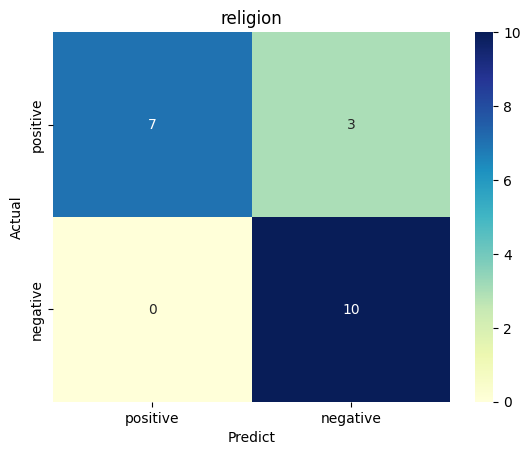

### False negatives

name,description,rationale
Poothan and Thira,"Poothan and Thira is a ritualistic folk art performed mainly in the Valluvanad region (present-day Palakkad district) of central Kerala in India, in which people dance in costumes representing Poothan is the lieutenant of Kali, and Thira, the goddess Kali, to the accompaniment of drummers. Thudi a small drum using for poothan, and heavy drum para accompanying thira.","Based on the provided definition of religion, Poothan and Thira can be considered a religion because it includes designated behaviors and practices, such as the ritualistic folk dance. It also involves beliefs and worldviews, as represented by the characters Poothan, the lieutenant of Kali, and Thira, the goddess Kali. The performance is accompanied by drummers, which can be seen as a form of religious music. Furthermore, the dance itself can be seen as a form of ritual, which is a common element in many religions. Therefore, based on these elements, Poothan and Thira can be argued to be a form of religion."
Feast of the Annunciation,"The Feast of the Annunciation, in Greek, Ο Ευαγγελισμός της Θεοτόκου, contemporarily the Solemnity of the Annunciation, and also called Lady Day, the Feast of the Incarnation (Festum Incarnationis), or Conceptio Christi (Christ’s Conception), commemorates the visit of the archangel Gabriel to the Virgin Mary, during which he informed her that she would be the mother of Jesus Christ, the Son of God. It is celebrated on 25 March each year. In the Catholic Church, if 25 March falls during the Paschal Triduum, it is transferred forward to the first suitable day during Eastertide. In Eastern Orthodoxy and Eastern Catholicism, it is never transferred, even if it falls on Pascha (Easter). The concurrence of these two feasts is called Kyriopascha. The Feast of the Annunciation is observed almost universally throughout Christianity, especially within the Eastern Orthodoxy Church, Anglicanism, the Catholic Church, and Lutheranism. It is a major Marian feast, classified as a solemnity in the Catholic Church, a Festival in Lutheranism, and a Principal Feast in the Anglican Communion. In the Eastern Orthodox Church, because it announces the incarnation of Christ, it is counted as one of the eight great feasts of the Lord. Examples of the importance attached to the Annunciation, especially in the Catholic Church, are the Angelus and the Hail Mary prayers, the event's position as the first Joyful Mystery of the Dominican Rosary, the Novena for the Feast of the Annunciation., and the numerous depictions of the Annunciation in Christian art.","The Feast of the Annunciation does not fit the definition of a religion as provided. It is a specific event or practice within certain religions, particularly within Christianity. While it involves designated behaviors, practices, beliefs, and is related to the supernatural and spiritual elements, it is not a range of social-cultural systems. It does not have its own set of morals, worldviews, texts, sanctified places, prophecies, ethics, or organizations. It is a part of the religious practices of Christianity, but it does not contain all the elements that constitute a religion. Therefore, it cannot be argued that the Feast of the Annunciation is a religion based on the provided definition."
Eid il-Burbara,"Eid il-Burbara or Saint Barbara's Day (Arabic: عيد البربارة), and also called the Feast of Saint Barbara, is a holiday annually celebrated on 17 December (Gregorian calendar) or 4 December (Julian calendar) amongst Middle Eastern Christians in Lebanon, Syria, Jordan, Palestine, and Turkey (Hatay Province). It is also celebrated as Barbaroba (ბარბარობა) amongst Christians in Georgia. Its celebration shares many elements with Hallowe'en, though coming from a much earlier tradition, and unrelated to the feast of the dead. Traditionally, adults and children wearing disguise go around houses in the villages dancing and singing the story of Saint Barbara; and in each

## Q317548: resort town

A resort town, resort city or resort destination, is an urban area where tourism or vacationing is the primary component of the local culture and economy.  A typical resort town has one or more actual resorts in the surrounding area. Sometimes the term resort town is used simply for a locale popular among tourists. One task force in British Columbia used the definition of an incorporated or unincorporated contiguous area where the ratio of transient rooms, measured in bed units, is greater than 60% of the permanent population.Generally, tourism is the main export in a resort town economy, with most residents of the area working in the tourism or resort industry. Shops and luxury boutiques selling locally themed souvenirs, motels, and unique restaurants often proliferate the downtown areas of a resort town. In the case of the United States, resort towns were created around the late 1800s and early 1900s with the development of early town-making. Many resort towns feature ambitious architecture, romanticizing their location, and dependence on cheap labor.

### Confusion matrix

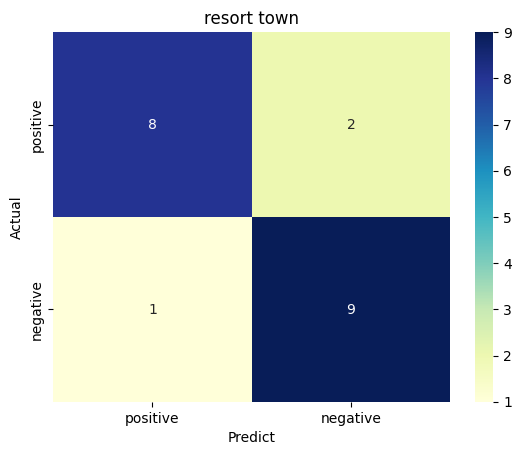

### False positives

name,description,rationale
Bad Nauheim,"Bad Nauheim is a town in the Wetteraukreis district of Hesse state of Germany. As of 2020, Bad Nauheim has a population of 32,493. The town is approximately 35 kilometres (22 mi) north of Frankfurt am Main, on the east edge of the Taunus mountain range. It is a world-famous resort, noted for its salt springs, which are used to treat heart and nerve diseases. A Nauheim or ""effervescent"" bath, named after Bad Nauheim, is a type of spa bath through which carbon dioxide is bubbled. This bath was one of several types of hydrotherapy used at Battle Creek Sanitarium and it was also used at Maurice bathhouse, in Bathhouse Row in the early 1900s, during the heyday of hydrotherapy. The Konitzky Foundation, a charitable foundation and hospital for those without means, was founded in 1896 and its building occupies a central place next to the Kurpark.","Bad Nauheim fits the definition of a resort town as it is an urban area where tourism or vacationing is a primary component of the local culture and economy. The town is world-famous as a resort, particularly noted for its salt springs which are used to treat heart and nerve diseases. This indicates that there is at least one actual resort in the surrounding area of the town. The presence of a type of spa bath, named after Bad Nauheim, that is used for hydrotherapy further supports the town's status as a resort destination. The existence of the Konitzky Foundation, a charitable foundation and hospital for those without means, suggests that there are facilities in place to cater to the needs of visitors, which is typical of a resort town. Therefore, based on the provided definition, Bad Nauheim can be considered a resort town."


### False negatives

name,description,rationale
Alsfeld,"Alsfeld (German pronunciation: [ˈalsfɛlt]) is a town in the center of Hesse, in Germany. Located about 100 km (62 mi) north of Frankfurt, Alsfeld is part of the densely populated Frankfurt Rhine-Main Metropolitan Region, with nearby Lauterbach (about 15 km (9.3 mi) east), one of the two centre cities of the Vogelsbergkreis district. Alsfeld is best described as a blend of a historic bourgeois European town and its rural-agricultural environs and shaped by typical Lutheran-Pietist characteristics, such as austerity and a Protestant work ethic. It is well known for its well-preserved old town with hundreds of picturesque timber-frame houses, and part of the German Timber-Frame Road.","The text does not provide sufficient information to argue that Alsfeld is a resort town. The definition of a resort town emphasizes its reliance on tourism or vacationing as the primary component of the local culture and economy, with most residents working in the tourism or resort industry. It also mentions the presence of resorts, shops selling souvenirs, and unique restaurants. However, the description of Alsfeld does not mention any of these characteristics. It describes Alsfeld as a historic town with well-preserved timber-frame houses, but it does not indicate that tourism is the main component of its economy or culture. Therefore, based on the provided information, it cannot be argued that Alsfeld is a resort town."
Weinböhla,"Weinböhla is a municipality in the district of Meißen, in Saxony, Germany. It is situated 7 km east of Meißen, and 17 km northwest of Dresden. The municipality can be reached from Dresden by Dresdner Verkehrsbetriebe tram route 4.","The text does not provide sufficient information to argue that Weinböhla is a resort town. The description of Weinböhla does not mention tourism or vacationing as a primary component of its local culture and economy. It also does not mention the presence of any resorts, transient rooms, or a population working primarily in the tourism or resort industry. Therefore, based on the provided information, it cannot be asserted that Weinböhla is a resort town."


## Q203958: reflection nebula

In astronomy, reflection nebulae are clouds of interstellar dust which might reflect the light of a nearby star or stars. The energy from the nearby stars is insufficient to ionize the gas of the nebula to create an emission nebula, but is enough to give sufficient scattering to make the dust visible. Thus, the frequency spectrum shown by reflection nebulae is similar to that of the illuminating stars. Among the microscopic particles responsible for the scattering are carbon compounds (e. g. diamond dust) and compounds of other elements such as iron and nickel. The latter two are often aligned with the galactic magnetic field and cause the scattered light to be slightly polarized.


### Confusion matrix

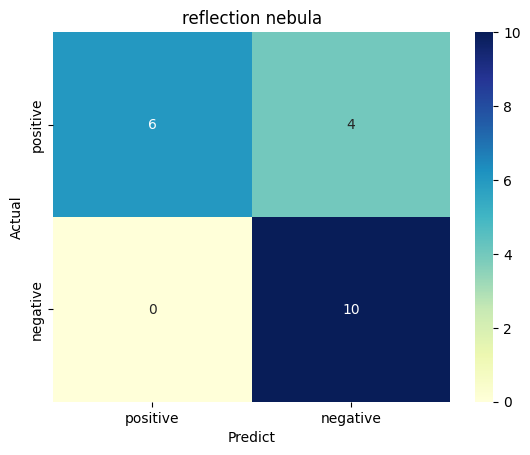

### False negatives

name,description,rationale
Calabash Nebula,"The Calabash Nebula, also known as the Rotten Egg Nebula or by its technical name OH 231.84 +4.22, is a protoplanetary nebula (PPN) 1.4 light years (13 Pm) long and located some 5,000 light years (47 Em) from Earth in the constellation Puppis. The name ""Calabash Nebula"" was first proposed in 1989 in an early paper on its expected nebular dynamics, based on the nebula's appearance. The Calabash is almost certainly a member of the open cluster Messier 46, as it has the same distance, radial velocity, and proper motion. The central star is QX Puppis, a binary composed of a very cool Mira variable and an A-type main-sequence star.","The provided description of the Calabash Nebula does not provide sufficient information to argue that it is a reflection nebula. The definition of a reflection nebula involves it reflecting the light of nearby stars due to the presence of interstellar dust, and the frequency spectrum being similar to the illuminating stars. The description of the Calabash Nebula does not mention any of these characteristics. Therefore, based solely on the provided information, it cannot be asserted that the Calabash Nebula is a reflection nebula."
Orion Nebula,"The Orion Nebula (also known as Messier 42, M42, or NGC 1976) is a diffuse nebula situated in the Milky Way, being south of Orion's Belt in the constellation of Orion, and is known as the middle ""star"" in the ""sword"" of Orion. It is one of the brightest nebulae and is visible to the naked eye in the night sky with apparent magnitude 4.0. It is 1,344 ± 20 light-years (412.1 ± 6.1 pc) away and is the closest region of massive star formation to Earth. The M42 nebula is estimated to be 24 light-years across (so its apparent size from Earth is approximately 1 degree). It has a mass of about 2,000 times that of the Sun. Older texts frequently refer to the Orion Nebula as the Great Nebula in Orion or the Great Orion Nebula.The Orion Nebula is one of the most scrutinized and photographed objects in the night sky and is among the most intensely studied celestial features. The nebula has revealed much about the process of how stars and planetary systems are formed from collapsing clouds of gas and dust. Astronomers have directly observed protoplanetary disks and brown dwarfs within the nebula, intense and turbulent motions of the gas, and the photo-ionizing effects of massive nearby stars in the nebula.","The provided description of the Orion Nebula does not provide sufficient information to argue that it is a reflection nebula. The definition of a reflection nebula involves the reflection of light from nearby stars by interstellar dust, with the energy being insufficient to ionize the gas of the nebula but enough to scatter and make the dust visible. The description of the Orion Nebula does not mention these specific characteristics. It talks about the nebula's visibility, size, distance from Earth, and its role in star and planetary system formation, but it does not mention the reflection of light from nearby stars or the presence of interstellar dust. Therefore, based solely on the provided definition and description, we cannot assert that the Orion Nebula is a reflection nebula."
RCW 34,"RCW 34 (Gum 19) - H II region and the emission nebula located in the constellation Vela. It is located approximately 22,000 light years from Earth. Named after Australian astronomer Colin Stanley Gum.The nebula RCW 34 is relatively dark. However, when observed using infrared wavelengths, two different areas are visible - one half of the nebula is bright,and the other is dark. The bright side is the hydrogen illuminated by a nearby blue supergiant star, and dark is the place where new stars surround the central star on the other side. The source of energy that stimulates the nebula RCW 34 to shine is a huge, extremely hot star V391 Velorum with a surface temperature of up to 30,000 °C. Because it is a variable star, it evokes violent ph

## Q15634554: state with limited recognition

A sovereign state is a state that has the highest authority over a territory. International law defines sovereign states as having a permanent population, defined territory, a government not under another, and the capacity to interact with other sovereign states. It is also commonly understood that a sovereign state is independent.According to the declarative theory of statehood, a sovereign state can exist without being recognised by other sovereign states. Unrecognised states will often find it difficult to exercise full treaty-making powers or engage in diplomatic relations with other sovereign states.

### Confusion matrix

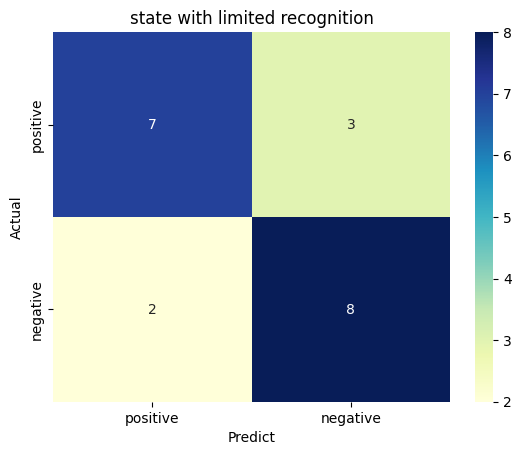

### False positives

name,description,rationale
Almohad Caliphate,"The Almohad Caliphate (IPA: ; Arabic: خِلَافَةُ ٱلْمُوَحِّدِينَ or دَوْلَةُ ٱلْمُوَحِّدِينَ or ٱلدَّوْلَةُ ٱلْمُوَحِّدِيَّةُ from Arabic: ٱلْمُوَحِّدُونَ, romanized: al-Muwaḥḥidūn, lit. 'those who profess the unity of God': 246 ) was a North African Berber Muslim empire founded in the 12th century. At its height, it controlled much of the Iberian Peninsula (Al-Andalus) and North Africa (the Maghreb).The Almohad movement was founded by Ibn Tumart among the Berber Masmuda tribes, but the Almohad caliphate and its ruling dynasty were founded after his death by Abd al-Mu'min al-Gumi. Around 1120, Ibn Tumart first established a Berber state in Tinmel in the Atlas Mountains. Under Abd al-Mu'min (r. 1130–1163) they succeeded in overthrowing the ruling Almoravid dynasty governing Morocco in 1147, when he conquered Marrakesh and declared himself caliph. They then extended their power over all of the Maghreb by 1159. Al-Andalus soon followed, and all of Muslim Iberia was under Almohad rule by 1172.The turning point of their presence in the Iberian Peninsula came in 1212, when Muhammad III, ""al-Nasir"" (1199–1214) was defeated at the Battle of Las Navas de Tolosa in the Sierra Morena by an alliance of the Christian forces from Castile, Aragon and Navarre. Much of the remaining territories of al-Andalus were lost in the ensuing decades, with the cities of Córdoba and Seville falling to the Christians in 1236 and 1248 respectively. The Almohads continued to rule in Africa until the piecemeal loss of territory through the revolt of tribes and districts enabled the rise of their most effective enemies, the Marinids, from northern Morocco in 1215. The last representative of the line, Idris al-Wathiq, was reduced to the possession of Marrakesh, where he was murdered by a slave in 1269; the Marinids seized Marrakesh, ending the Almohad domination of the Western Maghreb.","The Almohad Caliphate can be considered a state with limited recognition based on the provided definition. The Almohad Caliphate had a permanent population, defined territory, a government not under another, and the capacity to interact with other sovereign states. It was a North African Berber Muslim empire founded in the 12th century, controlling much of the Iberian Peninsula and North Africa. It had its own government, led by a caliph, and was not under the control of another state. It also had the capacity to interact with other sovereign states, as evidenced by its conflicts and interactions with Christian forces from Castile, Aragon, and Navarre. However, the Almohad Caliphate's recognition was likely limited, as it faced opposition and eventual overthrow by the Marinids. This suggests that while it had the characteristics of a sovereign state, its recognition and legitimacy were contested, making it a state with limited recognition."
Fatimid Caliphate,"The Fatimid Caliphate was an Ismaili Shi'a caliphate extant from the tenth to the twelfth centuries AD. Spanning a large area of North Africa, it ranged from the Atlantic Ocean in the west to the Red Sea in the east. The Fatimids, a dynasty of Arab origin, trace their ancestry to Muhammad's daughter Fatima and her husband ‘Ali b. Abi Talib, the first Shi‘a imam. The Fatimids were acknowledged as the rightful Imams by different Isma‘ili communities, as well as by denominations in many other Muslim lands and adjacent regions. Originating during the Abbasid Caliphate, the Fatimids conquered Ifriqiya and established the city of al-Mahdiyya. The Ismaili dynasty ruled territories across the Mediterranean coast of Africa and ultimately made Egypt the center of the caliphate. At its height, the caliphate included – in addition to Egypt – varying areas of the Maghreb, Sudan, Sicily, the Levant, and the Hijaz. Between 902 and 909 the foundation of the Fatimid state was realized under the leadership of da'i (missionary) Abu Abdallah, whose conquest of Aghlabid Ifriqiya paved the way for

### False negatives

name,description,rationale
Indonesia,"Indonesia, officially the Republic of Indonesia (Indonesian: Republik Indonesia), is an island nation in Southeast Asia and Oceania between the Indian and Pacific oceans. It consists of over 17,000 islands, including Sumatra, Java, Sulawesi, and parts of Borneo and New Guinea. Indonesia is the world's largest archipelagic state and the 14th-largest country by area, at 1,904,569 square kilometres (735,358 square miles). With around 280 million people, Indonesia is the world's fourth-most populous country and the most populous Muslim-majority country. Java, the world's most populous island, is home to more than half of the country's population. Indonesia is a presidential republic with an elected legislature. It has 38 provinces, of which nine have special status. The country's capital, Jakarta, is the world's second-most populous urban area. Indonesia shares land borders with Papua New Guinea, East Timor, and the eastern part of Malaysia, as well as maritime borders with Singapore, Vietnam, Thailand, the Philippines, Australia, Palau, and India. Despite its large population and densely populated regions, Indonesia has vast areas of wilderness that support one of the world's highest levels of biodiversity. The Indonesian archipelago has been a valuable region for trade since at least the seventh century, when the Srivijaya Kingdom formed trade links with China. Indonesian history has been influenced by foreign powers drawn to its natural resources. Under Indian influence, Hindu and Buddhist kingdoms flourished from the early centuries CE. Muslim traders later brought Islam, and European powers fought one another to monopolise trade in the Spice Islands of Maluku during the Age of Discovery. Following three and a half centuries of Dutch colonialism, Indonesia secured its independence after World War II. Indonesia's history has since been turbulent, with challenges posed by natural disasters, corruption, separatism, a democratisation process, and periods of rapid economic change. Indonesia consists of thousands of distinct native ethnic and hundreds of linguistic groups, with Javanese being the largest. A shared identity has developed with the motto ""Bhinneka Tunggal Ika"" (""Unity in Diversity"" literally, ""many, yet one""), defined by a national language, cultural diversity, religious pluralism within a Muslim-majority population, and a history of colonialism and rebellion against it. The economy of Indonesia is the world's 16th-largest by nominal GDP and the 7th-largest by PPP. It is the world's third-largest democracy, a regional power and is considered a middle power in global affairs. The country is a member of several multilateral organisations, including the United Nations, World Trade Organization, G20, and a founding member of the Non-Aligned Movement, Association of Southeast Asian Nations, East Asia Summit, D-8 and the Organisation of Islamic Cooperation.","The text does not provide any information to support the assertion that Indonesia is a state with limited recognition. According to the provided description, Indonesia is a sovereign state with a permanent population, defined territory, a government not under another, and the capacity to interact with other sovereign states. It is also mentioned that Indonesia is a member of several multilateral organisations, including the United Nations, World Trade Organization, G20, and a founding member of the Non-Aligned Movement, Association of Southeast Asian Nations, East Asia Summit, D-8 and the Organisation of Islamic Cooperation. This indicates that Indonesia is widely recognized by other sovereign states. Therefore, based on the provided information, it cannot be argued that Indonesia is a state with limited recognition."
Tatarstan,"Tatarstan (Tatar: Татарстан; Russian: Татарстан), officially the Republic of Tatarstan, sometimes also called Tataria, is a republic of the Russian Federation, located in Eastern Europe. It is a part o

## Q749316: snack

A snack is a small portion of food generally eaten between meals. Snacks come in a variety of forms including packaged snack foods and other processed foods, as well as items made from fresh ingredients at home. Traditionally, snacks are prepared from ingredients commonly available at home without a great deal of preparation. Often cold cuts, fruits, leftovers, nuts, sandwiches, and sweets are used as snacks.  With the spread of convenience stores, packaged snack foods became a significant business. Snack foods are typically designed to be portable, quick, and satisfying.  Processed snack foods, as one form of convenience food, are designed to be less perishable, more durable, and more portable than prepared foods.  They often contain substantial amounts of sweeteners, preservatives, and appealing ingredients such as chocolate, peanuts, and specially designed flavors (such as flavored potato chips). A snack eaten shortly before going to bed or during the night may be called a "bedtime snack", "late night snack", or "midnight snack".

### Confusion matrix

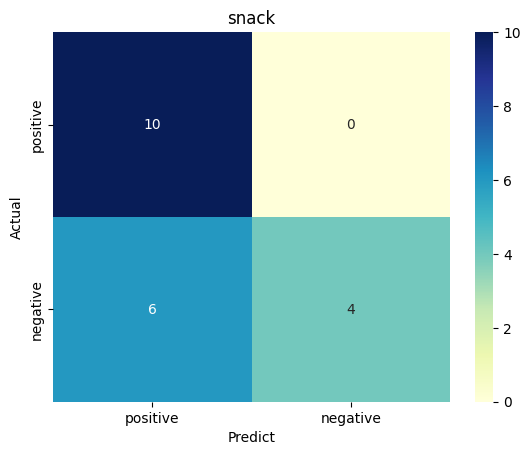

### False positives

name,description,rationale
Guoba Cuisine,"Guoba Cuisine (In Tianjin dialect/kɑ21 bɑ1 ʦʰaɪ̯53/, homophony in Mandarin sounds like ""Gaba Cuisine""), is a kind of authentic speciality and typical breakfast in Tianjin, China. There is nowhere to find its specific origin, as it is said to have a history of over 300 years. Guoba Cuisine is well-known for its salty but delicious taste. It used to be divided into two categories: vegetarian and meat, though only the vegetarian version is still popular today. Dafulai Guoba Cuisine is the most representative time-honored brand in terms of Guoba Cuisine in Tianjin. In 1997, Dafulai Guoba cuisine was ranked among the first batch of ""Famous Chinese Snacks"" by the Chinese Cooking Association. Its cooking techniques had also already been listed in the second batch of Intangible Cultural Heritage of Tianjin city in 2009. Nowadays, Guoba Cuisine is most popular in its birthplace, Tianjin, while it is also sold in the Tianjin speciality restaurants in the Chinese gathering regions in America and Canada.","Guoba Cuisine fits the definition of a snack as it is a type of food that is typically consumed as a breakfast item in Tianjin, China, which suggests it is eaten between main meals. It is also described as a ""speciality"", indicating that it is not a staple food item, but rather a smaller portion of food enjoyed for its unique taste, similar to a snack. Furthermore, it is mentioned that Guoba Cuisine is sold in specialty restaurants in America and Canada, suggesting that it is portable and can be consumed on the go, which aligns with the characteristics of a snack. Therefore, based on the provided definition and information, Guoba Cuisine can be considered a snack."
Boost (health food),Disambiguation error when retrieving summary,"Based on the definition provided, a snack is a small portion of food generally eaten between meals and can come in a variety of forms including packaged snack foods and other processed foods. It is designed to be portable, quick, and satisfying. Although there is a disambiguation error when retrieving the summary for Boost (health food), if we consider it as a health food product, it is likely to be packaged and processed, making it portable and quick to consume. It is also likely to be satisfying due to its nutritional content. Therefore, it can be argued that Boost (health food) can be considered a snack."
Charentais melon,"A Charentais melon is a type of French cantaloupe, Cucumis melo var. cantalupensis. It is a small variety of melon, around the size of a softball. It has flesh similar to most cantaloupes, but with a distinct and more intense aroma, and a more orangey hue. It originated in the Charentes region of France, and is most associated with the Provençal area around the town of Cavaillon. Most true Charentais melons are grown in and around this region, and are almost exclusively available in France, owing to the fact that their thin skin and soft flesh does not do well in shipping. Hybrids of this variety are widely grown, they are generally crossed with North American cantaloupes for better shipping characteristics and larger size.","Based on the definition provided, a snack is a small portion of food generally eaten between meals and can come in a variety of forms including fresh ingredients. A Charentais melon fits this description as it is a type of food that can be eaten in small portions. It is a small variety of melon, around the size of a softball, which makes it portable and quick to eat, characteristics that are typical of snacks. Furthermore, it does not require a great deal of preparation, another characteristic of traditional snacks. Therefore, a Charentais melon can be considered a snack."
Oyster,"Oyster is the common name for a number of different families of salt-water bivalve molluscs that live in marine or brackish habitats. In some species, the valves are highly calcified, and many are somewhat irregular in shape. Many, but not all 

## Q7068215: nucleated village

A nucleated village, or clustered settlement, is one of the main types of settlement pattern. It is one of the terms used by geographers and landscape historians to classify settlements. It is most accurate with regard to planned settlements: its concept is one in which the houses, even most farmhouses within the entire associated area of land, such as a parish, cluster around a central church, which is close to the village green.  Other focal points can be substituted depending on cultures and location, such as a commercial square, circus, crescent, a railway station, park or a sports stadium. A clustered settlement contrasts with these:
dispersed settlement linear settlement polyfocal settlement, two (or more) adjacent nucleated villages that have expanded and merged to form a cohesive overall communityA sub-category of clustered settlement is a planned village or community, deliberately established by landowners or the stated and enforced planning policy of local authorities and central governments.

### Confusion matrix

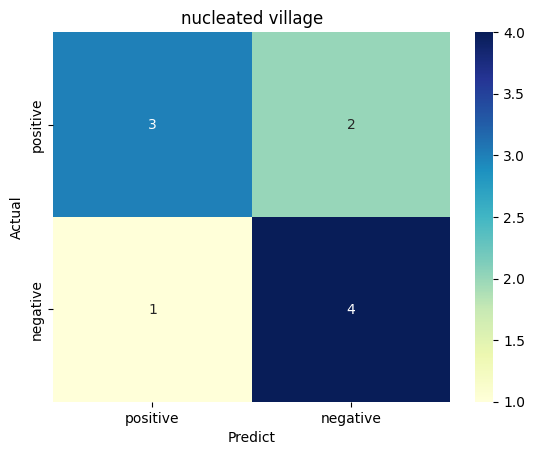

### False positives

name,description,rationale
Kings Langley,"Kings Langley is a village, former manor and civil parish in Hertfordshire, England, 21 miles (34 kilometres) north-west of Westminster in the historic centre of London and to the south of the Chiltern Hills. It now forms part of the London commuter belt. The village is divided between two local government districts by the River Gade with the larger western portion in the Borough of Dacorum and smaller part, to the east of the river, in Three Rivers District. It was the location of Kings Langley Palace and the associated King's Langley Priory, of which few traces survive. It is situated 2 mi (3 km) south of Hemel Hempstead and 2 mi (3 km) north of Watford. The earliest mention in surviving documents of the manor of Langalega is in a Saxon charter dated circa 1050. It appears as Langelai in the Domesday Book of 1086, and is recorded as Langel' Regis (""Langley of the King"") in 1254. The name means ""long wood or clearing"".","Kings Langley can be considered a nucleated village based on the provided definition. The village is described as having a central location, with its houses and other structures clustered around it. This is in line with the definition of a nucleated village, which is a settlement where houses and other buildings cluster around a central point, such as a church or a village green. Furthermore, Kings Langley is described as a former manor and civil parish, which suggests that it may have been planned and established by landowners or local authorities, another characteristic of a nucleated village. The village's location between two larger towns (Hemel Hempstead and Watford) also suggests that it may have been a focal point for the surrounding area, further supporting the argument that it is a nucleated village."


### False negatives

name,description,rationale
"Forest Hills, Nova Scotia","Forest Hills is a subdivision in the community of Cole Harbour and in the Canadian province of Nova Scotia, located in the Halifax Regional Municipality.","The provided description does not provide enough information to definitively argue that Forest Hills, Nova Scotia is a nucleated village. The definition of a nucleated village involves a clustered settlement where houses and other buildings, such as farmhouses, are grouped around a central point like a church, commercial square, or other focal point. The description of Forest Hills, Nova Scotia only mentions that it is a subdivision in the community of Cole Harbour, located in the Halifax Regional Municipality. Without additional information about the layout and structure of Forest Hills, such as the presence of a central focal point around which buildings are clustered, it is not possible to argue that it fits the definition of a nucleated village."
"Alma, Ontario","Alma is an unincorporated rural community in Mapleton Township, Wellington County, Ontario, Canada.","The provided description does not provide enough information to definitively argue that Alma, Ontario is a nucleated village. The definition of a nucleated village involves specific details about the layout and planning of the settlement, such as the clustering of houses around a central point like a church or village green. The description of Alma, Ontario does not provide any details about its layout, planning, or the distribution of its buildings. Therefore, based on the information given, it is not possible to argue that Alma, Ontario is a nucleated village."


## Q207241: applied arts

The applied arts are all the arts that apply design and decoration to everyday and essentially practical objects in order to make them aesthetically pleasing. The term is used in distinction to the fine arts, which are those that produce objects with no practical use, whose only purpose is to be beautiful or stimulate the intellect in some way. In practice, the two often overlap.  Applied arts largely overlap with decorative arts, and the modern making of applied art is usually called design. Examples of applied arts are:
Industrial design – mass-produced objects. Sculpture – also counted as a fine art. Architecture – also counted as a fine art. Crafts – also counted as a fine art. Ceramic art Automotive design Fashion design Calligraphy Interior design Graphic design Cartographic (map) design


### Confusion matrix

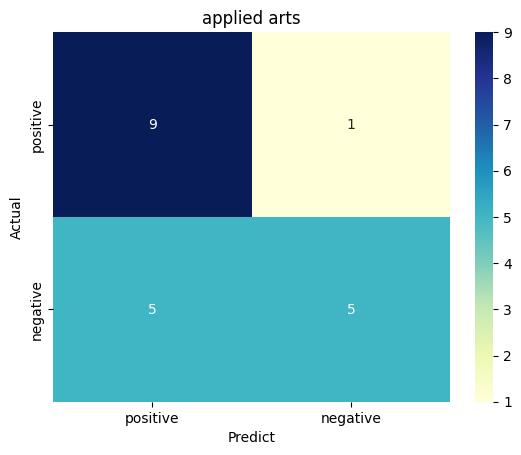

### False positives

name,description,rationale
Hope Skip and Jump,"Hope Skip and Jump is a 2012 mixed media collage by artist India Cruse-Griffin located on the Eskenazi Health campus, near downtown Indianapolis, Indiana, and is part of the Eskenazi Health Art Collection.","The artwork Hope Skip and Jump can be considered an example of applied arts based on the definition provided. The piece is a mixed media collage, which implies the application of design and decoration to create an aesthetically pleasing object. Although the practical use of the artwork is not explicitly stated, its location on the Eskenazi Health campus suggests that it serves a practical purpose in enhancing the environment and contributing to the overall aesthetic of the campus. Therefore, based on the definition of applied arts as arts that apply design and decoration to everyday and essentially practical objects, Hope Skip and Jump can be considered an example of applied arts."
Friends (collage),"Friends is a 2011 mixed media collage by artist India Cruse-Griffin located on the Eskenazi Health campus, near downtown Indianapolis, Indiana, and is part of the Eskenazi Health Art Collection.","Friends (collage) can be considered an example of applied arts because it is a piece of art that applies design and decoration to an everyday and essentially practical object. In this case, the practical object is the Eskenazi Health campus. The collage is used to make the campus more aesthetically pleasing, thus fulfilling the purpose of applied arts. Even though it is a piece of fine art, it also falls under the category of applied arts due to its practical use in enhancing the visual appeal of the campus."
Indo-Portuguese Museum,"The Indo-Portuguese Museum is a museum in Fort Kochi, Kerala, India.","The Indo-Portuguese Museum, as a museum, is a building that houses and displays collections of historical, scientific, artistic, or cultural interest. As such, it falls under the category of architecture, which is listed as an example of applied arts in the provided definition. Therefore, it can be argued that the Indo-Portuguese Museum is an example of applied arts."
Namoradeira,"Namoradeira (sweethearts) is the name given to a type of a popular sculpture in the state of Minas Gerais, Brazil. The name, ""namoradeira"", literally means a ""girl who dates"", a ""dating nut"", or it can be better translated from Portuguese as ""sweetheart"". It can be found in many different sizes and materials, such as wood, ceramics, plaster and resin. They stand with one arm resting horizontally and the other holding a hand to his face. They are mostly seen decorating sills of windows and balconies. They seem to look at infinity, as if they were waiting for time to pass or for their boyfriends, hence the name ""namoradeiras"", or ""sweethearts"".","Namoradeira can be considered an example of applied arts because it involves the application of design and decoration to an everyday object, in this case, a sculpture. The sculpture is designed to be aesthetically pleasing and is used to decorate window sills and balconies, making it a practical object. The fact that it can be made from different materials such as wood, ceramics, plaster, and resin also indicates the application of design principles. Therefore, based on the definition provided, Namoradeira fits into the category of applied arts."
Sunday Morning (collage),"Sunday Morning is a 2013 mixed media collage by artist India Cruse-Griffin located on the Eskenazi Health campus, near downtown Indianapolis, Indiana, and is part of the Eskenazi Health Art Collection.","The collage ""Sunday Morning"" by India Cruse-Griffin can be considered an example of applied arts based on the definition provided. The artwork is a mixed media collage, which involves the use of design and decoration, key elements in applied arts. Although the practical use of the collage is not explicitly stated, it is located on the Eskenazi Health campus and is part of the Eskenazi Health

### False negatives

name,description,rationale
Détecteur à Grande Acceptance pour la Physique Photonucléaire Expérimentale,"DAPHNE (Détecteur à Grande Acceptance pour la Physique Photonucléaire Expérimentale) was designed by the DAPNIA department of the Commissariat à l'Energie Atomique, in collaboration with the Istituto Nazionale di Fisica Nucleare. The original purpose of the detector was to explore the quantum chromodynamics (QCD) properties of nucleons (i.e. protons and neutrons). To explore these properties, excitation states of the nuclei require to be measured (e.g. Delta baryons, symbol Δ). These excited states of nucleons decay via the emission of light mesons such as pions (π), eta mesons (η) or kaons (K). Various models exist that describe the correlation between the observed reactions, the excited states and QCD. DAPHNE was built to observe charged light mesons from the decay of excited nucleon states. The excitation of nuclei can be done with either pion scattering, or real photon scattering on the nucleon. Real photon scattering has the advantage that the first vertex can be cleanly described by the well known quantum electrodynamics (QED), while for the pion scattering at least two strong interaction vertices exist that require much more effort from models. The detector was used by the Commissariat à l'Énergie Atomique in– Saclay, France (accelerator SATURNE, 19871990) and the Institut für Kernphysik in Mainz, Germany (accelerator MAMI, 1990–2003).","The assertion that Détecteur à Grande Acceptance pour la Physique Photonucléaire Expérimentale (DAPHNE) is an example of applied arts cannot be supported based on the provided definition. The definition of applied arts involves the application of design and decoration to everyday and essentially practical objects to make them aesthetically pleasing. DAPHNE, on the other hand, is a scientific instrument designed for the purpose of exploring the quantum chromodynamics properties of nucleons. While it may involve design in its construction, there is no information provided to suggest that this design is intended to make it aestically pleasing, nor is it an everyday object. It is a specialized tool for scientific research. Therefore, it does not fit within the defined concept of applied arts."


## Q10210: white wine

White wine is a wine that is fermented without skin contact. The colour can be straw-yellow, yellow-green, or yellow-gold. It is produced by the alcoholic fermentation of the non-coloured pulp of grapes, which may have a skin of any colour. White wine has existed for at least 4,000 years. The wide variety of white wines comes from the large number of varieties, methods of winemaking, and ratios of residual sugar. White wine is mainly from "white" grapes, which are green or yellow in colour, such as the Chardonnay, Sauvignon blanc and Riesling. Some white wine is also made from grapes with coloured skin, provided that the obtained wort is not stained. Pinot noir, for example, is commonly used to produce champagne. Among the many types of white wine, dry white wine is the most common. More or less aromatic and tangy, it is derived from the complete fermentation of the wort. Sweet wines, on the other hand, are produced by interrupting the fermentation before all the grape sugars are converted into alcohol; this is called Mutage or fortification. The methods of enriching wort with sugar are multiple: on-ripening on the vine, passerillage (straining), or the use of noble rot. Sparkling wines, which are mostly white, are wines where the carbon dioxide from the fermentation is kept dissolved in the wine and becomes gas when the bottle is opened. White wines are often used as an apéritif before a meal, with dessert, or as a refreshing drink between meals. White wines are often considered more refreshing and lighter in both style and taste than the majority of their red wine counterparts. Due to their acidity, aroma and ability to soften meat and deglaze cooking juices, white wines are often used in cooking.

### Confusion matrix

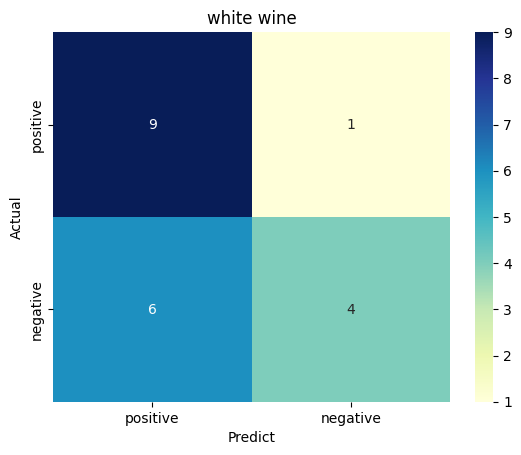

### False positives

name,description,rationale
Vin de liqueur,A vin de liqueur is a sweet fortified style of French wine that is fortified with brandy to unfermented grape must. The term vin de liqueur is also used by the European Union to refer to all fortified wines. These wines are similar to vins doux naturels but are sweeter and have more flavor influence from the added brandy. A vin de liqueur is usually served as an apéritif.,"The definition of white wine includes wines that are produced by interrupting the fermentation before all the grape sugars are converted into alcohol, which is referred to as Mutage or fortification. This process results in sweet wines. The description of Vin de liqueur indicates that it is a sweet fortified style of French wine that is fortified with brandy to unfermented grape must, which aligns with the process of fortification mentioned in the definition of white wine. Furthermore, Vin de liqueur is usually served as an apéritif, which is also a common way to serve white wines. Therefore, based on the provided definitions, it can be argued that Vin de liqueur is a type of white wine."
Beaune wine,"Beaune wine is produced in the commune of Beaune in the Côte de Beaune subregion of Burgundy. The appellation d'origine contrôlée (AOC) Beaune may be used for red and white wine with respectively Pinot noir and Chardonnay as the main grape variety. The production consists of slightly over 85 percent red wine, and slightly less than 15 percent white wine. While there are no Grand cru vineyards within Beaune, there are several well-known and highly regarded Premier cru vineyards, including some that are owned by the large négociant houses in Beaune and produce some of their ""flagship"" wines at the Premier cru level. The AOC was created in 1936. In 2008, there was 411.7 hectares (1,017 acres) of vineyard surface in production for Beaune wine at village and Premier cru level, making Beaune the largest village-named appellation of the Côte d'Or, just ahead of Gevrey-Chambertin AOC in vineyard size. A total of 15,652 hectolitres of wine were produced in 2008, of which 13,319 hectolitres were red wine and 2,333 hectolitres white wine. Some 357.06 hectares (882.3 acres) of this area was used for the red wines in 2007. The total amount produced corresponds to almost 2.1 million bottles, which included almost 1.8 million bottles of red wine and a little over 300,000 bottles of white wine. For white wines, the AOC regulations allow both Chardonnay and Pinot blanc to be used, but most wines are 100% Chardonnay. The AOC regulations also allow up to 15 percent total of Chardonnay, Pinot blanc and Pinot gris as accessory grapes in the red wines, but this is not practised very often. The allowed base yield is 40 hectoliters per hectare of red wine and 45 hectoliters per hectare for white wine. The grapes must reach a maturity of at least 10.5 percent potential alcohol for village-level red wine, 11.0 percent for village-level white wine and Premier Cru red wine, and 11.5 percent for Premier cru white wine. Beaune is also the centre of the Burgundy wine business, with most of the largest négociants located in the town, as well as the Hospices de Beaune, which annually holds a charity wine auction.","The definition of white wine states that it is produced by the alcoholic fermentation of the non-coloured pulp of grapes, which may have a skin of any colour. It also mentions that white wine is mainly from ""white"" grapes, which are green or yellow in colour, such as the Chardonnay. The description of Beaune wine states that the appellation d'origine contrôlée (AOC) Beaune may be used for red and white wine with respectively Pinot noir and Chardonnay as the main grape variety. It also mentions that slightly less than 15 percent of the production consists of white wine. Furthermore, for white wines, the AOC regulations allow both Chardonnay and Pinot blanc to be used, but most wines are 100% Chardonnay. This aligns with the definition of 

### False negatives

name,description,rationale
Vazisubani,Disambiguation error when retrieving summary,"The prompt does not provide any information or context that connects the entity Vazisubani to the concept of white wine. Therefore, based on the information given, it is not possible to provide a rationale or argument asserting that Vazisubani is a white wine."


## Q3312129: track and field

Track and field is a sport that includes athletic contests based on running, jumping, and throwing skills. The name is derived from where the sport takes place, a running track and a grass field for the throwing and some of the jumping events. Track and field is categorized under the umbrella sport of athletics, which also includes road running, cross country running and racewalking. The foot racing events, which include sprints, middle- and long-distance events, racewalking, and hurdling, are won by the athlete who completes it in the least time. The jumping and throwing events are won by those who achieve the greatest distance or height. Regular jumping events include long jump, triple jump, high jump, and pole vault, while the most common throwing events are shot put, javelin, discus, and hammer. There are also "combined events" or "multi events", such as the pentathlon consisting of five events, heptathlon consisting of seven events, and decathlon consisting of ten events. In these, athletes participate in a combination of track and field events. Most track and field events are individual sports with a single victor; the most prominent team events are relay races, which typically feature teams of four. Events are almost exclusively divided by gender, although both the men's and women's competitions are usually held at the same venue. Recently, "mixed" relay events have been introduced into meets, whereby two men and two women make up the four-person team. If a race has too many people to run all at once, preliminary heats will be run to narrow down the field of participants. Track and field is one of the oldest sports. In ancient times, it was an event held in conjunction with festivals and sports meets such as the Ancient Olympic Games in Greece. In modern times, the two most prestigious international track and field competitions are the athletics competition at the Olympic Games and the World Athletics Championships. World Athletics, formerly known as the International Association of Athletics Federations (IAAF), is the international governing body for the sport of athletics. Records are kept of the best performances in specific events, at world, continental, and national levels, right down to a personal level. However, if athletes are deemed to have violated the event's rules or regulations, they are disqualified from the competition and their marks are erased. In the United States, the term track and field may refer to other athletics events, such as cross country, the marathon, and road running, rather than strictly track-based events.

### Confusion matrix

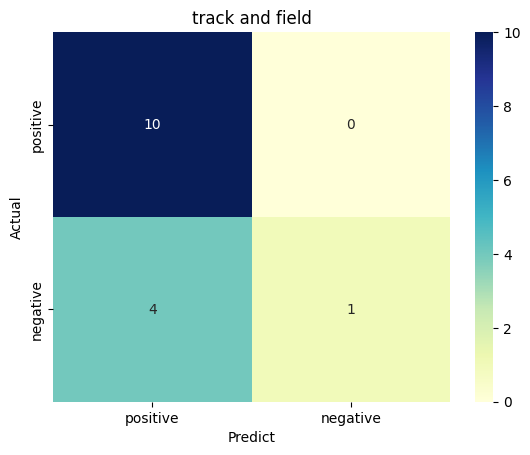

### False positives

name,description,rationale
Run London,"Run London (2001–2010) was an annual 10 km run (or series of runs), organised by Nike and held within London, UK. The events are unique in having different themes and marketing campaigns each year.","Run London is a track and field event based on the definition provided. The definition of track and field includes athletic contests based on running, jumping, and throwing skills. Run London is an annual 10 km run, which falls under the category of running. Therefore, it can be considered a track and field event. Even though the definition also mentions that track and field events usually take place on a running track and a grass field, it also includes road running under the umbrella of athletics. Since Run London is a road running event held within London, it still aligns with the broader definition of track and field."
Fifth Avenue Mile,"The Fifth Avenue Mile is an annual 1 mile (1.6 km) road race on Fifth Avenue in New York City, United States. The race begins at 80th Street and heads twenty blocks south to 60th Street. First held on September 26, 1981, the race is currently organized by New York Road Runners. The competition regularly attracts world-class runners, who compete in special heats after the regular age division heats. The Fifth Avenue Mile has also inspired similar events in the same mould, including the Anlene Orchard Mile in Singapore.The record performances of the race are Sydney Maree's victory at the inaugural race in 3:47.52, and Laura Muir's time of 4:14.8 set in 2022. Jennifer Simpson of the United States has historically been the most successful athlete at the competition, having won 8 races. The winners at the most recent edition in 2022 were Jake Wightman and Laura Muir, a second consecutive 'Scottish double' after Wightman and Jemma Reekie won the event in 2021. The Fifth Avenue Mile was originally held in late September or early October. In 2014 it was moved to mid September near Patriot Day. The race has been sponsored by Pepsi (1981), Mercedes-Benz (1986-1991), Discover Card (1994-1996), Donald Trump (1997-1998), Continental Airlines (2005-2010) and currently New Balance (since 2016).","The Fifth Avenue Mile can be considered a track and field event based on the definition provided. Track and field is a sport that includes athletic contests based on running, jumping, and throwing skills. The Fifth Avenue Mile is an athletic contest based on running, as it is a 1 mile road race. Although it does not take place on a traditional running track or field, it still falls under the umbrella of athletics, which includes road running. The event is also competitive, with athletes aiming to complete the race in the least time, which aligns with the definition of track and field events being won by the athlete who completes it in the least time. Therefore, based on the provided definition, the Fifth Avenue Mile can be considered a track and field event."
Masters athletics,"Masters athletics is a class of the sport of athletics for athletes of over 35 years of age. The events include track and field, road running and cross country running. Competitors are bracketed into five-year age groups (which promotes fair competition). For international events the first age group is 35 to 39. Men as old as 105 and women in their 100s have competed in running, jumping and throwing events. Masters athletes are sometimes known as ""veterans"" and the European Masters Championships, for instance, is known as ""Eurovets"". This and other high level events including biennial World Championships cater largely to elite-level athletes, but many masters athletes are novices to athletics and enjoy the camaraderie offered by masters competition at the local, National and International level. Most National governing bodies for track and field hold annual Masters championships. Prestigious National meets such as the Penn Relays and the United States Olympic Trials (track and field) put on exhibitio

## Q29556: civil liberties

Civil liberties are guarantees and freedoms that governments commit not to abridge, either by constitution, legislation, or judicial interpretation, without due process. Though the scope of the term differs between countries, civil liberties may include the freedom of conscience, freedom of press, freedom of religion, freedom of expression, freedom of assembly, the right to security and liberty, freedom of speech, the right to privacy, the right to equal treatment under the law and due process, the right to a fair trial, and the right to life. Other civil liberties include the right to own property, the right to defend oneself, and the right to bodily integrity. Within the distinctions between civil liberties and other types of liberty, distinctions exist between positive liberty/positive rights and negative liberty/negative rights.

### Confusion matrix

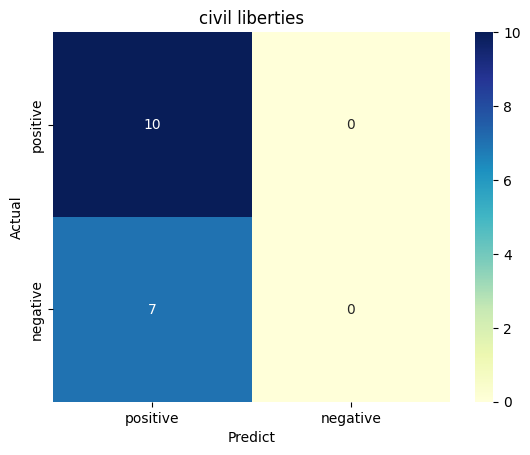

### False positives

name,description,rationale
Freedom of education,"Freedom of education is the right for parents to have their children educated in accordance with their religious and other views, allowing groups to be able to educate children without being impeded by the nation state. Freedom of education is a constitutional (legal) concept that has been included in the European Convention on Human Rights, Protocol 1, Article 2, International Covenant on Economic, Social and Cultural Rights Article 13 and several national constitutions, e.g. the Belgian constitution (former article 17, now article 24) and the Dutch constitution (article 23).","Freedom of education can be considered a civil liberty as it is a freedom that governments commit not to abridge, either by constitution, legislation, or judicial interpretation, without due process. This is evident as freedom of education is a constitutional concept that has been included in various international and national legal documents, such as the European Convention on Human Rights and the constitutions of Belgium and the Netherlands. This right allows parents to have their children educated in accordance with their religious and other views, and allows groups to educate children without being impeded by the nation state. This aligns with the definition of civil liberties which includes the freedom of conscience, freedom of religion, and the right to equal treatment under the law and due process. Therefore, based on the provided definition, freedom of education can be classified as a civil liberty."
Library Bill of Rights,The Library Bill of Rights is the American Library Association's statement expressing the rights of library users to intellectual freedom and the expectations the association places on libraries to support those rights. The Association's Council has adopted a number of interpretations of the document applying it to various library policies.,"The Library Bill of Rights, as described, aligns with the concept of civil liberties as it is a statement expressing the rights of library users to intellectual freedom. This falls under the umbrella of civil liberties such as freedom of expression, freedom of speech, and the right to information. The expectations placed on libraries to support these rights also align with the concept of civil liberties, as it involves the commitment of an institution (in this case, libraries) not to abridge these freedoms. Therefore, based on the provided definition, the Library Bill of Rights can be considered a form of civil liberties."
Academic freedom,"Academic freedom is a moral and legal concept expressing the conviction that the freedom of inquiry by faculty members is essential to the mission of the academy as well as the principles of academia, and that scholars should have freedom to teach or communicate ideas or facts (including those that are inconvenient to external political groups or to authorities) without fear of repression, job loss, or imprisonment. While the core of academic freedom covers scholars acting in an academic capacity — as teachers or researchers expressing strictly scholarly viewpoints —, an expansive interpretation extends these occupational safeguards to scholars' speech on matters outside their professional expertise. Especially within the anglo-saxon discussion it is most commonly defined as a type of freedom of speech, while the current scientific discourse in the Americas and Continental Europe more often defines it as a human right, with freedom of speech being just one aspect among many within the concept of academic freedom. Academic freedom is a contested issue and, therefore, has limitations in practice. In the United States, for example, according to the widely recognized ""1940 Statement on Academic Freedom and Tenure"" of the American Association of University Professors, teachers should be careful to avoid controversial matters that are unrelated to the subject discussed. When they speak or write in public, th

In [7]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)